In [2]:
import diagonalizer_TI
from diagonalizer_TI import diagonalize, pSweep, spectrum_plot
import numpy as np
from copy import copy
from numpy import pi, cos, sin

SitesCount_Default = 400
fsysDefault = diagonalizer_TI.FinalizedSystem(SitesCount_Default)

#The parameters are taken from the Qi-Zhang RevModPhys for Bi2Se3
ParametersDefault = diagonalizer_TI.SimpleNamespace( A1=2.26, A2=3.33, C =-0.0083, D1 =5.74, D2 =30.4, \
                                                     M0=0.28, B1 = 6.86, B2 = 44.5,\
                     FermiEnergy = 0.2, lBinv2=0., x_shift= (SitesCount_Default - 1.)/2., \
                     EigenvectorsCount = 50, EnergyPrecision = 10**(-5), WavefunctionComponents = 4, \
                     py = 0., pz = 0. )

# We see the gap (bulk gap, I expect) and the "topologically protected" states (surface state, I expect)

## In presence of P-symmetry, energy levels for given $p^y$ and $p^z$ are two-fold degenerate

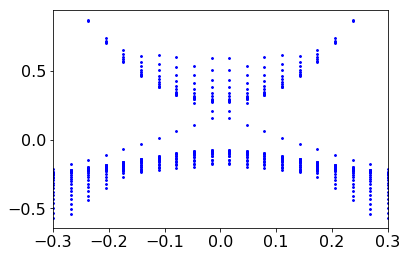

[-0.20471704 -0.20471704 -0.18581038 -0.18581038 -0.18101111 -0.18101111
 -0.16173964 -0.16173964 -0.15749943 -0.15749943 -0.14036015 -0.14036015
 -0.13623435 -0.13623435 -0.12218008 -0.12218008 -0.11881721 -0.11881721
 -0.10802109 -0.10802109 -0.10609822 -0.10609822 -0.09893843 -0.09893843
 -0.09838745 -0.09838745  0.05938203  0.05938203  0.31970671  0.31970671
  0.32551829  0.32551829  0.32946487  0.32946487  0.33647917  0.33647917
  0.34754776  0.34754776  0.36415279  0.36415279  0.38819724  0.38819724
  0.42180863  0.42180863  0.46696942  0.46696942  0.52509525  0.52509525
  0.59680597  0.59680597]


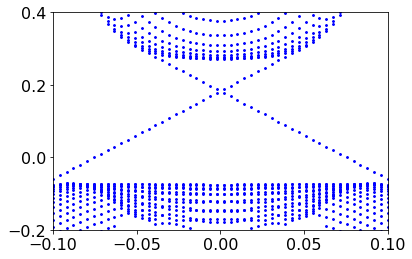

In [31]:
params = copy(ParametersDefault)
evals, evecs = pSweep(fsysDefault, params, -0.3, 0.3, 20, 'pzSweep')
spectrum_plot(evals, -0.3, 0.3, 20)
print(evals[12])
evals, evecs = pSweep(fsysDefault, params, -0.1, 0.1, 50, 'pySweep')
plt = spectrum_plot(evals, -0.1, 0.1, 50, ShowPlot = False)
plt.ylim(-0.2,0.4)
plt.show()

## In absence of P-symmetry, the gap is opened! Why?

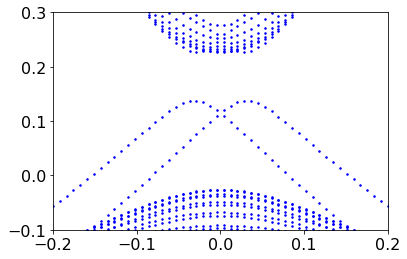

[-0.21723605 -0.21006626 -0.20711675 -0.19823535 -0.19268762 -0.19171597
 -0.18511736 -0.18181295 -0.17866265 -0.17808552 -0.17324757 -0.16926216
 -0.16770921 -0.1614502  -0.16106203 -0.15773967 -0.15332884 -0.13925544
 -0.13101949 -0.11930464 -0.1112283  -0.10008476 -0.09399418 -0.08348428
 -0.07977487 -0.07079005 -0.06909408 -0.06285123 -0.06242664 -0.02881881
  0.06668047  0.32225873  0.32549709  0.33185364  0.342129    0.35736451
  0.37889858  0.40826371  0.41972039  0.42287913  0.42910809  0.43938749
  0.44715542  0.45485007  0.47613639  0.49735969  0.50579711  0.54502975
  0.55917056  0.59529867]


In [36]:
params = copy(ParametersDefault)
params.b0 = 0.1
params.py = 0.02
evals, evecs = pSweep(fsysDefault, params, -0.2, 0.2, 50, 'pzSweep')
plt = spectrum_plot(evals, -0.2, 0.2, 50, ShowPlot = False)
plt.ylim(-0.1,0.3)
plt.show()
print(evals[12])

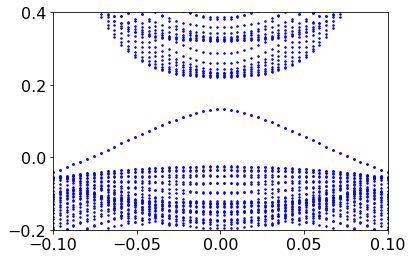

[-0.1784752  -0.17808912 -0.16758289 -0.16054828 -0.15149113 -0.15072863
 -0.145198   -0.13665265 -0.13281007 -0.13157196 -0.12722433 -0.12486926
 -0.12312227 -0.12302128 -0.11764625 -0.11710942 -0.11524984 -0.10194728
 -0.10157651 -0.08569898 -0.08237837 -0.06910007 -0.06536686 -0.05371221
 -0.05103829 -0.04131406 -0.03995742 -0.0332569  -0.03289081  0.05522621
  0.05522621  0.27713927  0.28232651  0.29139801  0.30451643  0.31996046
  0.33345074  0.34618839  0.3463574   0.35473761  0.36193572  0.37733188
  0.38199898  0.40969928  0.4165609   0.44702498  0.46987616  0.49542399
  0.53635141  0.55582915]


In [28]:
params = copy(ParametersDefault)
params.b0 = 0.1
evals, evecs = pSweep(fsysDefault, params, -0.1, 0.1, 50, 'pySweep')
plt = spectrum_plot(evals, -0.1, 0.1, 50, ShowPlot = False)
plt.ylim(-0.2,0.4)
plt.show()
print(evals[12])

# Landau levels: with P-symmetry, level bending is topologically non-trivial!

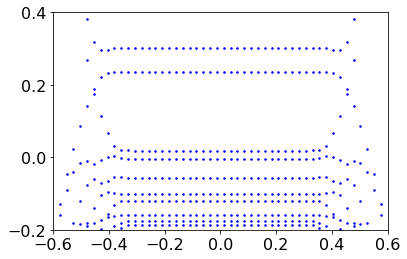

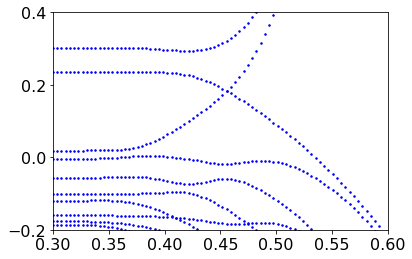

In [25]:
params = copy(ParametersDefault)
params.lBinv2 = 1 / 20.**2
params.EigenvectorsCount = 40
pyMin = -0.6
pyMax = 0.6
pyCount = 50
evals, evecs = pSweep(fsysDefault, params, pyMin, pyMax, pyCount, 'pySweep')
plt = spectrum_plot(evals, pyMin, pyMax, pyCount, ShowPlot = False)
plt.ylim(-0.2,0.4)
plt.show()

pyMin = 0.3
pyMax = 0.6
pyCount = 80
evals, evecs = pSweep(fsysDefault, params, pyMin, pyMax, pyCount, 'pySweep')
plt = spectrum_plot(evals, pyMin, pyMax, pyCount, ShowPlot = False)
plt.ylim(-0.2,0.4)
plt.show()

del params, evals, evecs, pyMin, pyMax, pyCount, plt 

## Somehow, without P-symmetry, the gap is opened in the surface states! Why?

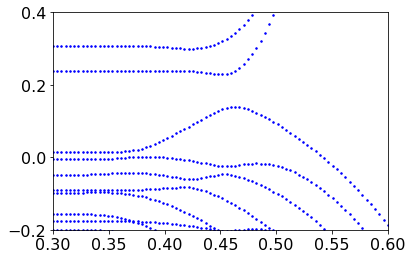

In [21]:
params = copy(ParametersDefault)
params.b0 = 0.1
params.lBinv2 = 1 / 20.**2
params.EigenvectorsCount = 40

pyMin = 0.3
pyMax = 0.6
pyCount = 80
evals, evecs = pSweep(fsysDefault, params, pyMin, pyMax, pyCount, 'pySweep')
plt = spectrum_plot(evals, pyMin, pyMax, pyCount, ShowPlot = False)
plt.ylim(-0.2,0.4)
plt.show()